### [Problem 1] Select features and categories for practice

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

In [23]:
from sklearn.datasets import load_iris
iris = load_iris()

In [24]:
data = pd.DataFrame(data = np.c_[iris['data']], columns = iris['feature_names'])
print(data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [25]:
# Store target vector in
target = pd.DataFrame(data = np.c_[iris['target']], columns = ['Species'])
target.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [26]:
df = pd.concat([data, target], axis = 1)
df = df.loc[df['Species'].isin([1, 2])]
df = df.reset_index(drop=True)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,7.0,3.2,4.7,1.4,1
1,6.4,3.2,4.5,1.5,1
2,6.9,3.1,4.9,1.5,1
3,5.5,2.3,4.0,1.3,1
4,6.5,2.8,4.6,1.5,1


In [27]:
df1 = df.loc[:, ['sepal length (cm)', 'petal length (cm)', 'Species']]
df1.head()

,sepal length (cm),petal length (cm),Species
0,7.0,4.7,1
1,6.4,4.5,1
2,6.9,4.9,1
3,5.5,4.0,1
4,6.5,4.6,1


### [Problem 2] Data analysis

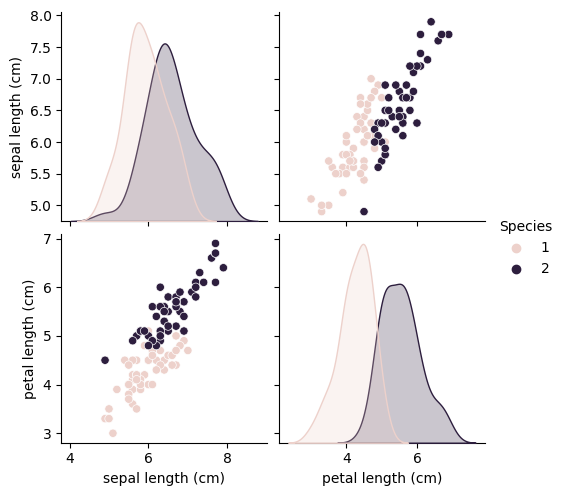

In [28]:
sns.pairplot(df1, hue = 'Species')

TypeError: ignored

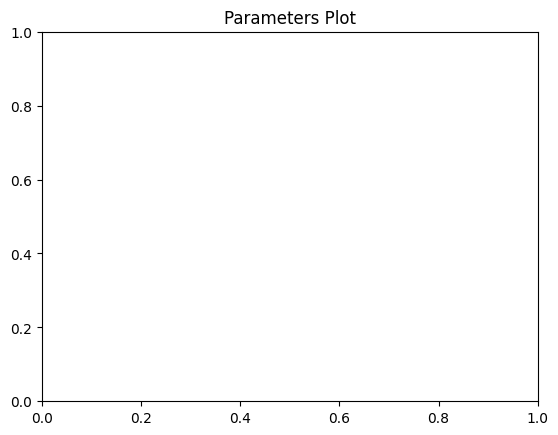

In [29]:
plt.title("Parameters Plot")
sns.scatterplot('sepal length (cm)', 'petal length (cm)', data = df1, hue = 'Species', palette = "deep")
plot.legend(loc = "upper left")
plt.show()

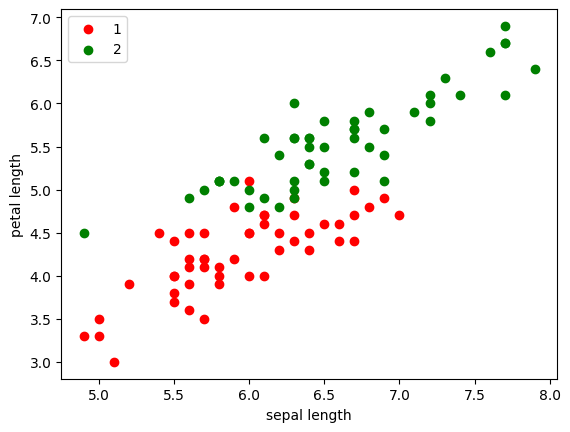

In [30]:
# other method
colors = ['red', 'green']
species = [1,2]
for i in range (2):
  x = df1[df1['Species'] == species[i] ]
  plt.scatter(x['sepal length (cm)'] , x['petal length (cm)'], c=colors[i], label=species[i])
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend()

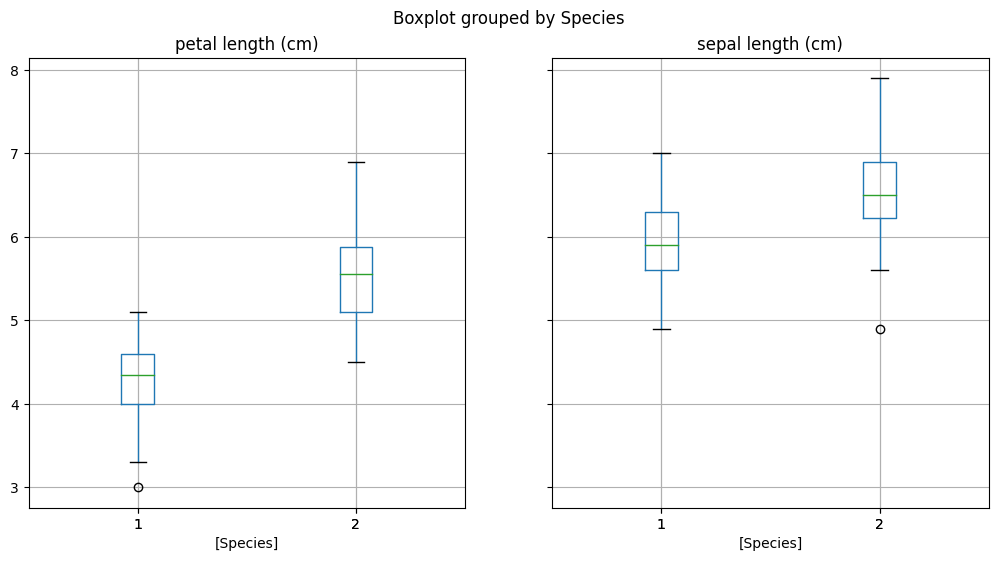

In [31]:
df1.boxplot(by = 'Species', figsize = (12, 6))
plt.show()

<Axes: xlabel='Species', ylabel='petal length (cm)'>

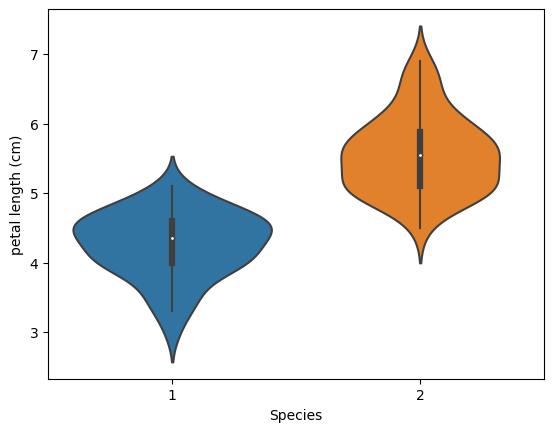

In [32]:
sns.violinplot(x = 'Species', y = 'petal length (cm)', data = df1, figsize = (12, 6))

In [35]:
X = np.array(df1.loc[:, ['sepal length (cm)', 'petal length (cm)']])
X.shape

(100, 2)

In [37]:
y = np.array(df1.loc[:, ['Species']]).ravel()
y.ndim

1

### [Problem 3] Division of preprocessing/training data and verification data

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#le = LabelEnconder()
#y = le.fit_transform(y)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [39]:
X_train.shape

(75, 2)

In [40]:
X_test.shape

(25, 2)

In [41]:
y_train.ndim

1

### [Problem 4] Pretreatment/Standardization

In [43]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
Scaler.fit(X_train)
X_trainTransform = Scaler.transform(X_train)
X_testTransform = Scaler.transform(X_test)

### [Problem 5] Learning and estimation

In [47]:
from sklearn.neighbors import KNeighborsClassifier
#Instantiate learning model (k = 5)
classifier5 = KNeighborsClassifier (n_neighbors = 5)
classifier5.fit(X_trainTransform , y_train )

#Predicting the Test set results
y_pred5 = classifier5.predict (X_testTransform )
print ("pred5 = " , y_pred5)

#Instantiate learning model (k = 1)
classifier1 = KNeighborsClassifier (n_neighbors = 1)
classifier1.fit(X_trainTransform , y_train)

# Predicting the Test set results
y_pred1 = classifier1.predict (X_testTransform )
print ("pred1 = " , y_pred1)

#Instantiate learning model (k = 3)
classifier3 = KNeighborsClassifier (n_neighbors= 3)
classifier3.fit(X_trainTransform , y_train)

# Predicting the Test set results
y_pred3 = classifier3.predict (X_testTransform)
print("pred3 = " , y_pred3)

pred5 =  [2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]
pred1 =  [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
pred3 =  [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]


### [Problem 6] Evaluation

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

prediction = [y_pred5, y_pred1 , y_pred3 ]
keys = ["knn5", "knn1" , "knn3"]

for a, prediction in enumerate(prediction , 0):
  print("prediction of = ", keys[a])
  print("Accuracy = ", accuracy_score (y_true = y_test, y_pred =prediction)*100)
  print("Recall = ", recall_score(y_true = y_test, y_pred = prediction, average = None))
  print("F1 score = ", f1_score(y_true = y_test, y_pred = prediction, average = None))
  print("Precission score = ", precision_score(y_true = y_test, y_pred = prediction, average = None))
  print("Confusion = ", confusion_matrix(y_true = y_test, y_pred=prediction))
  print('.......................................................')

prediction of =  knn5
Accuracy =  80.0
Recall =  [0.92857143 0.63636364]
F1 score =  [0.83870968 0.73684211]
Precission score =  [0.76470588 0.875     ]
Confusion =  [[13  1]
 [ 4  7]]
.......................................................
prediction of =  knn1
Accuracy =  80.0
Recall =  [0.85714286 0.72727273]
F1 score =  [0.82758621 0.76190476]
Precission score =  [0.8 0.8]
Confusion =  [[12  2]
 [ 3  8]]
.......................................................
prediction of =  knn3
Accuracy =  80.0
Recall =  [0.85714286 0.72727273]
F1 score =  [0.82758621 0.76190476]
Precission score =  [0.8 0.8]
Confusion =  [[12  2]
 [ 3  8]]
.......................................................


Recall is a measure that expresses the ratio of accurate positive predictions to the total potential positive predictions.

Accuracy is the number of correctly predicted data points out of all data points.Our starting point is classification accuracy. To convert it to a percentage, multiply the number of accurate predictions by the total number of predictions, then multiply the result by 100.

Precision provides a response to the question of how often a model was right out of the total number of times it projected positively. When false positives are highly valued and false negatives are highly valued, precision ought to be employed as a performance metric.

The F1 score serves as a performance metric in scenarios where the positive class has a limited number of samples, and the costs associated with both false positives and false negatives are substantial.

### [Problem 7] Visualization

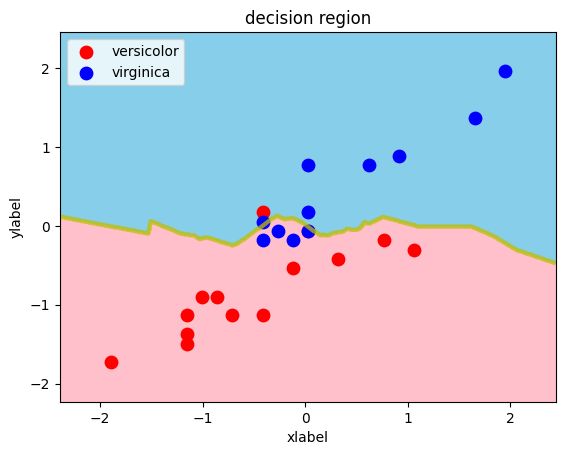

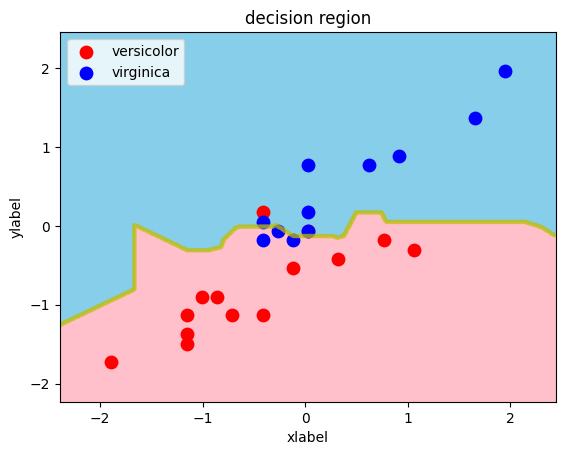

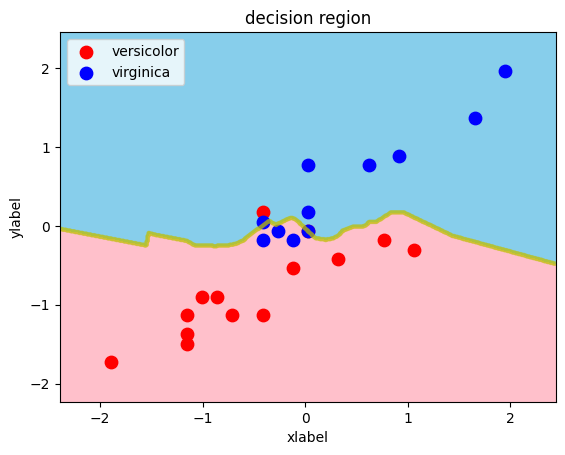

In [51]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
  # setting
  scatter_color = ['red', 'blue']
  contourf_color = ['pink', 'skyblue']
  n_class = 2
  # pred
  mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
  mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
  y_pred = model.predict(mesh).reshape(mesh_f0.shape)
  # plot
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
  plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
  for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
  patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
  plt.legend(handles=patches)
  plt.legend()
  plt.show()
models = [classifier5, classifier1, classifier3]
for a, model in enumerate(models, 1):
  decision_region(X_testTransform, y_test, model)

### [Problem 8] Learning by other methods

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [53]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
neig = KNeighborsClassifier()
neig.fit(X_trainTransform , y_train )
y_predn = neig.predict(X_testTransform)

In [56]:
# LOGISTIC REGRESSION
lr_classifier = LogisticRegression()
lr_classifier.fit(X_trainTransform , y_train);
y_pred_lrc = lr_classifier.predict (X_testTransform)

In [57]:
#Create a svm Classifier
clf = svm.SVC()
clf.fit(X_trainTransform, y_train)
y_pred_svm = clf.predict(X_test)

In [58]:
# DECISION TREE
dt_clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_clf.fit(X_trainTransform, y_train)
y_preddt = dt_clf.predict(X_testTransform)

In [59]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier (random_state =0)
rf_clf.fit(X_trainTransform, y_train)
y_predrf = rf_clf.predict(X_testTransform)

KNN
[2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]
Accuracy =  80.0
Recall =  [0.92857143 0.63636364]
F1 score =  [0.83870968 0.73684211]
Precission score =  [0.76470588 0.875     ]
Confusion =  [[13  1]
 [ 4  7]]


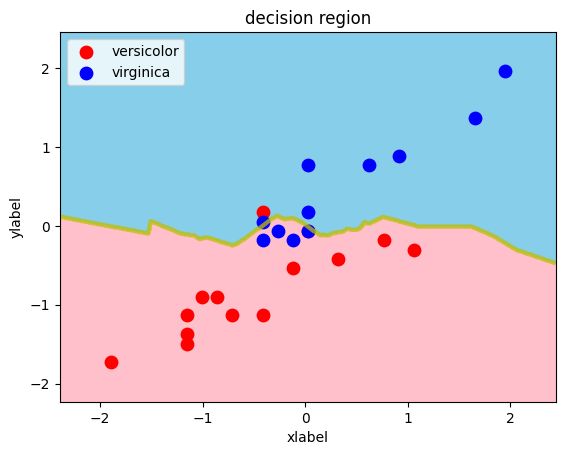



LOGISTIC REGRESSION 
[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 1 2]
 Accuracy =  84.0
 Recall =  [0.85714286 0.81818182]
F1 score =  [0.85714286 0.81818182]
Precission score =  [0.85714286 0.81818182]
 Confusion =  [[12  2]
 [ 2  9]]


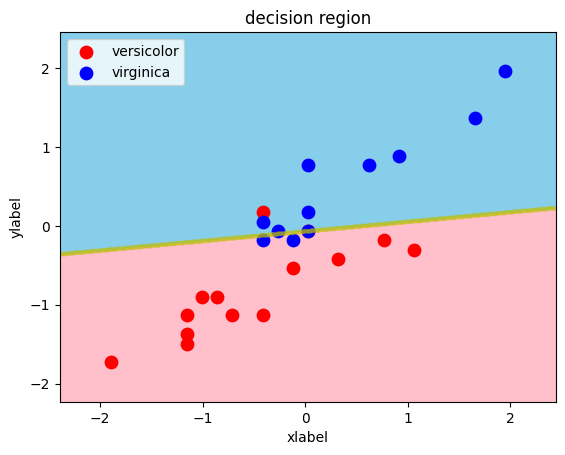



SVM
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 Accuracy =  44.0
 Recall =  [0. 1.]
F1 score =  [0.         0.61111111]
Precission score =  [0.   0.44]
 Confusion =  [[ 0 14]
 [ 0 11]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


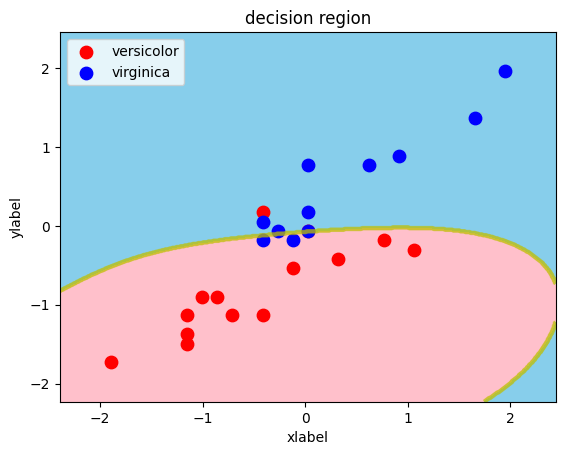



DECISION TREE
[2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]
 Accuracy =  80.0
 Recall =  [0.92857143 0.63636364]
F1 score =  [0.83870968 0.73684211]
Precission score =  [0.76470588 0.875     ]
 Confusion =  [[13  1]
 [ 4  7]]


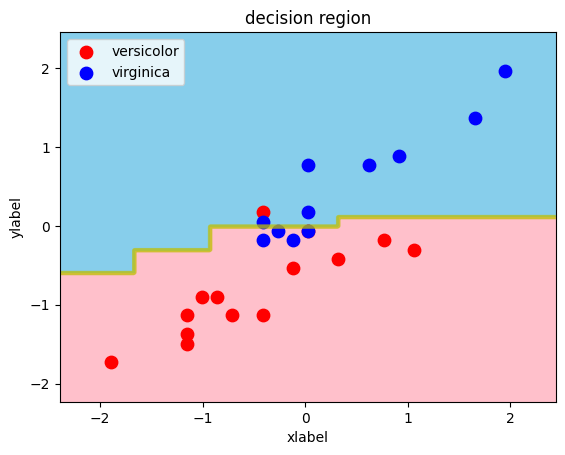



RANDOM FOREST
[2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 2 1 1 2 1 1 1 2]
 Accuracy =  84.0
 Recall =  [0.92857143 0.72727273]
F1 score =  [0.86666667 0.8       ]
Precission score =  [0.8125     0.88888889]
 Confusion =  [[13  1]
 [ 3  8]]


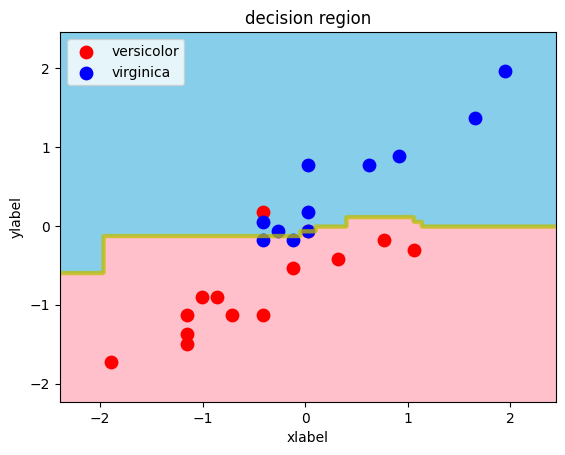

In [60]:
print("KNN")
print(y_predn)
print("Accuracy = ", accuracy_score( y_true = y_test, y_pred = y_predn)*100)
print( "Recall = ", recall_score(y_true = y_test, y_pred = y_predn, average=None))
print("F1 score = ", f1_score (y_true = y_test, y_pred = y_predn, average = None))
print("Precission score = ", precision_score(y_true = y_test, y_pred = y_predn, average=None))
print("Confusion = ", confusion_matrix(y_true = y_test, y_pred=y_predn))
decision_region (X_testTransform, y_test, neig)
print( '\n')


print("LOGISTIC REGRESSION ")
print(y_pred_lrc)
print(" Accuracy = ", accuracy_score (y_true   = y_test, y_pred = y_pred_lrc )*100 )
print(" Recall = ", recall_score(y_true = y_test, y_pred = y_pred_lrc, average = None))
print("F1 score = ", f1_score (y_true = y_test, y_pred = y_pred_lrc, average= None))
print("Precission score = ", precision_score(y_true = y_test , y_pred = y_pred_lrc , average= None))
print(" Confusion = ", confusion_matrix (y_true = y_test , y_pred = y_pred_lrc ) )
decision_region (X_testTransform , y_test,lr_classifier )
print('\n')

print("SVM")
print(y_pred_svm)
print(" Accuracy = ", accuracy_score (y_true = y_test, y_pred = y_pred_svm )*100 )
print(" Recall = ", recall_score(y_true = y_test, y_pred = y_pred_svm, average = None))
print("F1 score = ", f1_score (y_true = y_test, y_pred = y_pred_svm, average= None))
print("Precission score = ", precision_score(y_true = y_test , y_pred = y_pred_svm , average= None))
print(" Confusion = ", confusion_matrix (y_true = y_test , y_pred = y_pred_svm ) )
decision_region (X_testTransform , y_test,clf)
print('\n')

print("DECISION TREE")
print(y_preddt)
print(" Accuracy = ", accuracy_score (y_true = y_test, y_pred = y_preddt)*100 )
print(" Recall = ", recall_score(y_true = y_test, y_pred = y_preddt, average = None))
print("F1 score = ", f1_score (y_true = y_test, y_pred = y_preddt, average = None))
print("Precission score = ", precision_score(y_true = y_test , y_pred = y_preddt , average = None))
print(" Confusion = ", confusion_matrix (y_true = y_test , y_pred = y_preddt ) )
decision_region (X_testTransform , y_test,dt_clf)
print('\n')

print("RANDOM FOREST")
print(y_predrf)
print(" Accuracy = ", accuracy_score (y_true = y_test, y_pred = y_predrf)*100 )
print(" Recall = ", recall_score(y_true = y_test, y_pred = y_predrf, average = None))
print("F1 score = ", f1_score (y_true = y_test, y_pred = y_predrf, average = None))
print("Precission score = ", precision_score(y_true = y_test , y_pred = y_predrf, average = None))
print(" Confusion = ", confusion_matrix (y_true = y_test , y_pred = y_predrf))
decision_region (X_testTransform , y_test,rf_clf)
print('\n')

### [Problem 9] (Advanced task) Comparison with and without standardization

In [61]:
def comp_standard (title , prediction, model , std):
  print(title)
  print("Accuracy =", accuracy_score (y_true =  y_test, y_pred = prediction)*100)
  print("Recall =", recall_score (y_true=y_test, y_pred = prediction, average = None))
  print("F1 score = ", f1_score (y_true=y_test, y_pred=prediction, average=None))
  print("Precission score = ", precision_score (y_true = y_test, y_pred = prediction, average = None))
  print("Confusion = ", confusion_matrix (y_true = y_test, y_pred = prediction))
  decision_region(X_test, y_test, model)
model =  [neig, lr_classifier, clf, dt_clf, rf_clf]

KNN
Accuracy = 80.0
Recall = [0.92857143 0.63636364]
F1 score =  [0.83870968 0.73684211]
Precission score =  [0.76470588 0.875     ]
Confusion =  [[13  1]
 [ 4  7]]


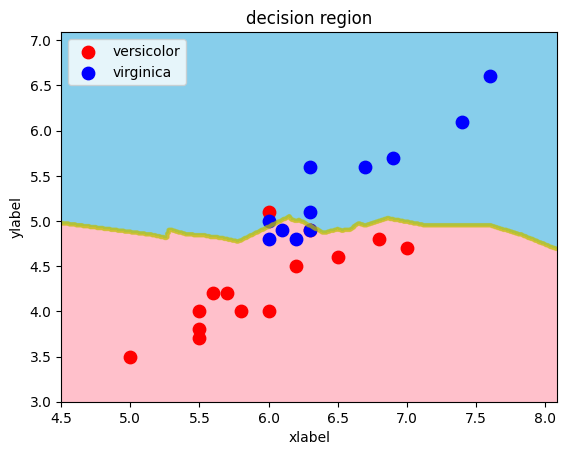

.................................................
LOGISTIC REGRESSION
Accuracy = 84.0
Recall = [0.85714286 0.81818182]
F1 score =  [0.85714286 0.81818182]
Precission score =  [0.85714286 0.81818182]
Confusion =  [[12  2]
 [ 2  9]]


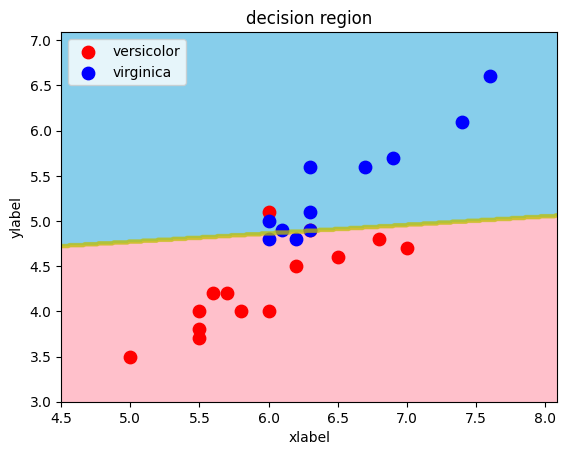

.................................................
SVM
Accuracy = 84.0
Recall = [0.85714286 0.81818182]
F1 score =  [0.85714286 0.81818182]
Precission score =  [0.85714286 0.81818182]
Confusion =  [[12  2]
 [ 2  9]]


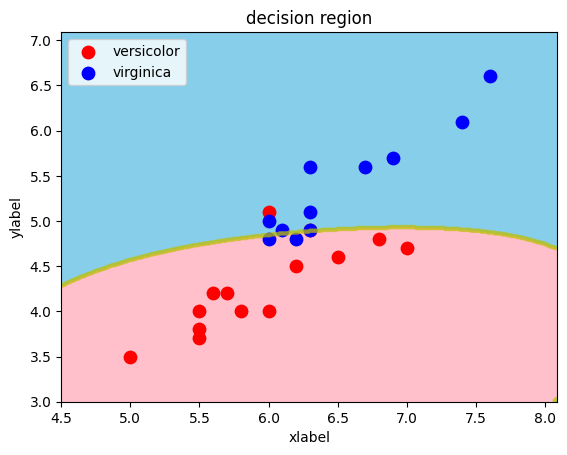

.................................................
 DECISION TREE
Accuracy = 80.0
Recall = [0.92857143 0.63636364]
F1 score =  [0.83870968 0.73684211]
Precission score =  [0.76470588 0.875     ]
Confusion =  [[13  1]
 [ 4  7]]


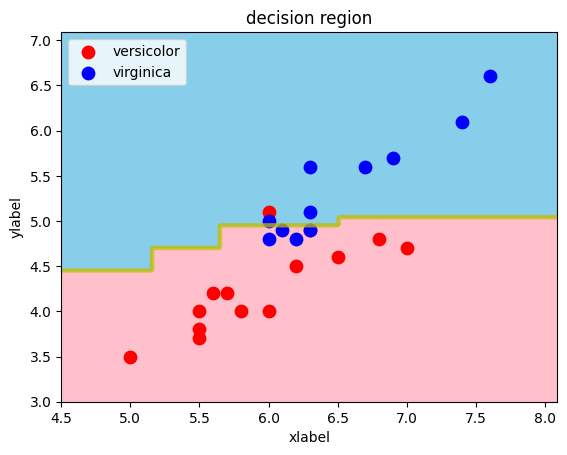

.................................................
Random Forest
Accuracy = 84.0
Recall = [0.92857143 0.72727273]
F1 score =  [0.86666667 0.8       ]
Precission score =  [0.8125     0.88888889]
Confusion =  [[13  1]
 [ 3  8]]


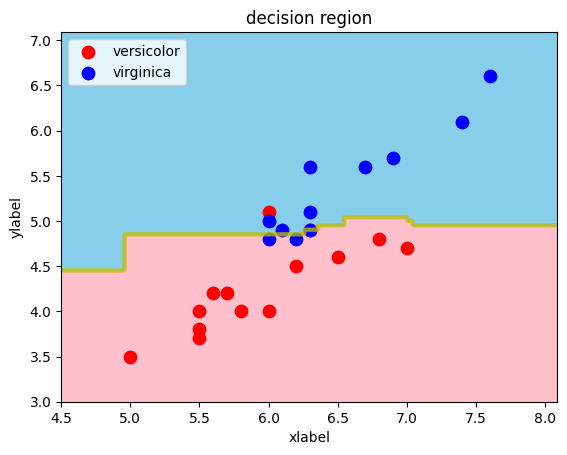

.................................................


In [62]:
#KNN
neig = KNeighborsClassifier()
neig.fit(X_train , y_train)
y_predn = neig.predict(X_test)
comp_standard('KNN', y_predn, neig, std = False)
print('.................................................')
# LOGISTIC REGRESSION
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train);
y_pred_lrc = lr_classifier.predict ( X_test)
comp_standard('LOGISTIC REGRESSION' , y_pred_lrc , lr_classifier , std = False )
print('.................................................')
#Create a svm Classifier
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred_svm = clf.predict(X_test)
comp_standard ("SVM", y_pred_svm, clf, std = False)
print('.................................................')
# DECISION TREE
dt_clf = DecisionTreeClassifier (criterion = 'entropy', random_state = 0)
dt_clf.fit (X_train , y_train)
y_preddt = dt_clf.predict(X_test)
comp_standard (' DECISION TREE', y_preddt, dt_clf , std = False)
print('.................................................')
#Random Forest
rf_clf = RandomForestClassifier (random_state=0)
rf_clf.fit (X_train, y_train)
y_predrf = rf_clf.predict(X_test)
comp_standard ('Random Forest', y_predrf, rf_clf, std = False)
print('.................................................')

### [Problem 10] (Advance assignment) Highly accurate method using all objective variables

In [67]:
# New training set
X1 = np.array(data.loc[:, ['sepal length (cm)', 'petal length (cm)']])
X1.shape

(150, 2)

In [68]:
y1 = np.array(target).ravel()
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [69]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, random_state = 42)
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((112, 2), (38, 2), (112,), (38,))

In [71]:
#KNN
kneig = KNeighborsClassifier()
kneig.fit(X1_train , y1_train)
y1_predn = kneig.predict(X1_test)

# LOGISTIC REGRESSION
lr_clf = LogisticRegression()
lr_clf.fit(X1_train, y1_train);
y1_pred_lrc = lr_clf.predict(X1_test)

#Create a svm Classifier
svm_clf = svm.SVC()
svm_clf.fit(X1_train, y1_train)
y1_pred_svm = svm_clf.predict(X1_test)

# DECISION TREE
dtree_clf = DecisionTreeClassifier(random_state = 0)
dtree_clf.fit(X1_train , y1_train)
y1_preddt = dtree_clf.predict(X1_test)

#Random Forest
ranf_clf = RandomForestClassifier (random_state=0)
ranf_clf.fit (X1_train, y1_train)
y1_predrf = ranf_clf.predict(X1_test)

In [72]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica', 'setosa']):
  # setting
  scatter_color = ['red', 'blue', 'green']
  contourf_color = ['pink', 'skyblue', 'purple']
  n_class = 3
  # pred
  mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
  mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
  y_pred = model.predict(mesh).reshape(mesh_f0.shape)
  # plot
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
  plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
  for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
  patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
  plt.legend(handles=patches)
  plt.legend()
  plt.show()
models = [classifier5, classifier1, classifier3]
#for a, model in enumerate(models, 1):
  #decision_range(X_testTransform, y_test, model)

KNN
[1 0 2 1 1 0 1 1 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Accuracy =  97.36842105263158
Recall =  [1.         1.         0.91666667]
F1 score =  [1.         0.95652174 0.95652174]
Precission score =  [1.         0.91666667 1.        ]
Confusion =  [[15  0  0]
 [ 0 11  0]
 [ 0  1 11]]


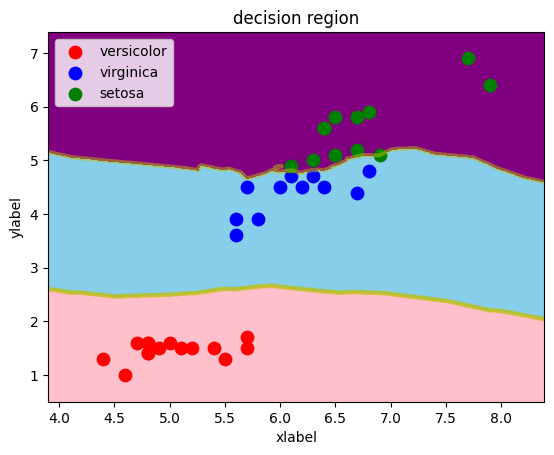

.................................................
LOGISTIC REGRESSION 
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
 Accuracy =  100.0
 Recall =  [1. 1. 1.]
F1 score =  [1. 1. 1.]
Precission score =  [1. 1. 1.]
 Confusion =  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


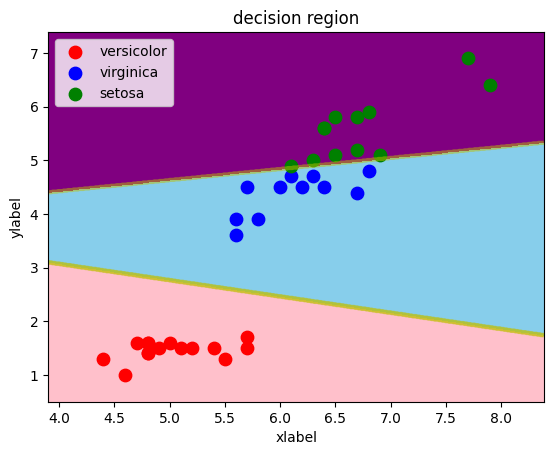

.................................................
SVM
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
 Accuracy =  100.0
 Recall =  [1. 1. 1.]
F1 score =  [1. 1. 1.]
Precission score =  [1. 1. 1.]
 Confusion =  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


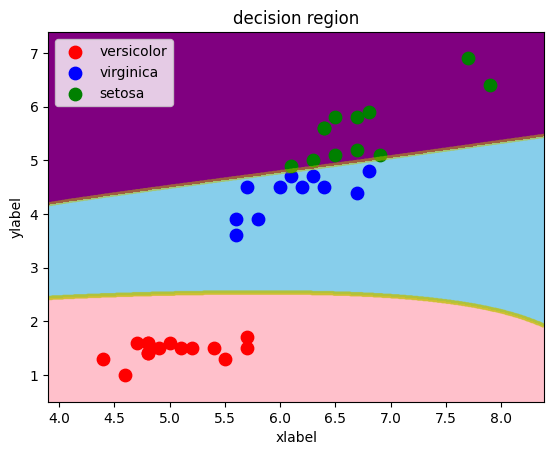

.................................................
DECISION TREE
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
 Accuracy =  100.0
 Recall =  [1. 1. 1.]
F1 score =  [1. 1. 1.]
Precission score =  [1. 1. 1.]
 Confusion =  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


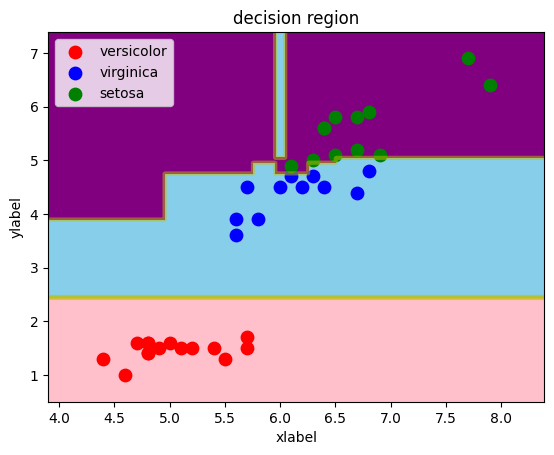

RANDOM FOREST
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
 Accuracy =  100.0
 Recall =  [1. 1. 1.]
F1 score =  [1. 1. 1.]
Precission score =  [1. 1. 1.]
 Confusion =  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


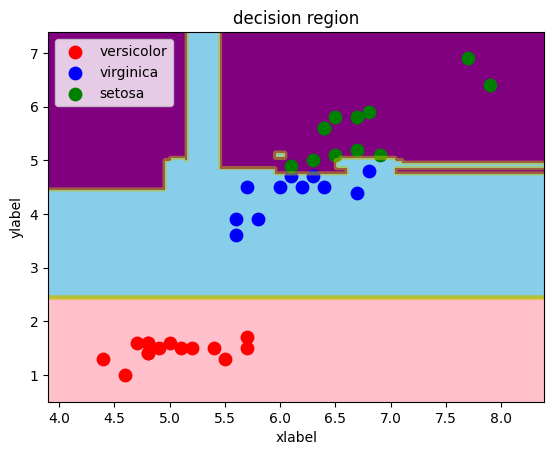

In [73]:
print("KNN")
print(y1_predn)
print("Accuracy = ", accuracy_score( y_true = y1_test, y_pred = y1_predn)*100)
print( "Recall = ", recall_score(y_true = y1_test, y_pred = y1_predn, average=None))
print("F1 score = ", f1_score (y_true = y1_test, y_pred = y1_predn, average = None))
print("Precission score = ", precision_score(y_true = y1_test, y_pred = y1_predn, average=None))
print("Confusion = ", confusion_matrix(y_true = y1_test, y_pred=y1_predn))
decision_region (X1_test, y1_test, kneig)
print('.................................................')

print("LOGISTIC REGRESSION ")
print(y1_pred_lrc)
print(" Accuracy = ", accuracy_score (y_true = y1_test, y_pred = y1_pred_lrc )*100 )
print(" Recall = ", recall_score(y_true = y1_test, y_pred = y1_pred_lrc, average = None))
print("F1 score = ", f1_score (y_true = y1_test, y_pred = y1_pred_lrc, average= None))
print("Precission score = ", precision_score(y_true = y1_test , y_pred = y1_pred_lrc , average= None))
print(" Confusion = ", confusion_matrix (y_true = y1_test , y_pred = y1_pred_lrc ) )
decision_region (X1_test , y1_test, lr_clf )
print('.................................................')

print("SVM")
print(y1_pred_svm)
print(" Accuracy = ", accuracy_score (y_true = y1_test, y_pred = y1_pred_svm )*100 )
print(" Recall = ", recall_score(y_true = y1_test, y_pred = y1_pred_svm, average = None))
print("F1 score = ", f1_score (y_true = y1_test, y_pred = y1_pred_svm, average= None))
print("Precission score = ", precision_score(y_true = y1_test , y_pred = y1_pred_svm , average= None))
print(" Confusion = ", confusion_matrix (y_true = y1_test , y_pred = y1_pred_svm ) )
decision_region (X1_test , y1_test, svm_clf)
print('.................................................')

print("DECISION TREE")
print(y1_preddt)
print(" Accuracy = ", accuracy_score (y_true = y1_test, y_pred = y1_preddt)*100 )
print(" Recall = ", recall_score(y_true = y1_test, y_pred = y1_preddt, average = None))
print("F1 score = ", f1_score (y_true = y1_test, y_pred = y1_preddt, average = None))
print("Precission score = ", precision_score(y_true = y1_test , y_pred = y1_preddt , average = None))
print(" Confusion = ", confusion_matrix (y_true = y1_test , y_pred = y1_preddt ) )
decision_region (X1_test , y1_test, dtree_clf)

print("RANDOM FOREST")
print(y1_predrf)
print(" Accuracy = ", accuracy_score (y_true = y1_test, y_pred = y1_predrf)*100 )
print(" Recall = ", recall_score(y_true = y1_test, y_pred = y1_predrf, average = None))
print("F1 score = ", f1_score (y_true = y1_test, y_pred = y1_predrf, average = None))
print("Precission score = ", precision_score(y_true = y1_test , y_pred = y1_predrf, average = None))
print(" Confusion = ", confusion_matrix (y_true = y1_test , y_pred = y1_predrf))
decision_region (X1_test, y1_test, ranf_clf)